In [1]:
import sys

sys.path.insert(0, "..")

In [ ]:
from matplotlib import pyplot as plt

from funbin.geometry import Box, as_poly_collection
from funbin.penrose import penrose_tiling, penrose_tiling_triangles

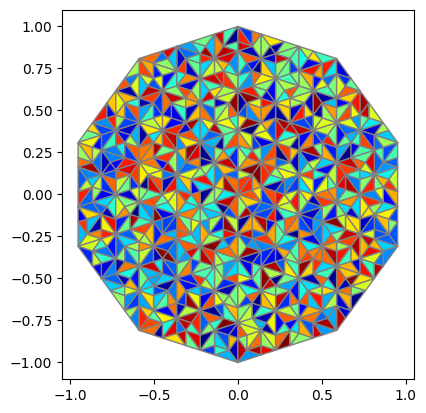

In [ ]:
tiling = penrose_tiling_triangles(kind="P3", divisions=5)

fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(tiling, randomize_color=True))
Box.bounding_all(tiling).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")

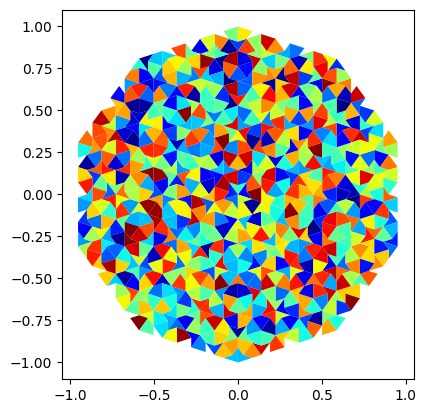

In [ ]:
merged_tiling = penrose_tiling(kind="P2", divisions=5, include_incomplete_tiles=False)
fig, ax = plt.subplots()
ax.add_collection(as_poly_collection(merged_tiling, randomize_color=True, edgecolors="none"))
Box.bounding_all(tiling).resized(1.1).fit_axes(ax)
ax.set_aspect("equal")